Decompressed 2002FemPreg.dat.gz to 2002FemPreg.dat


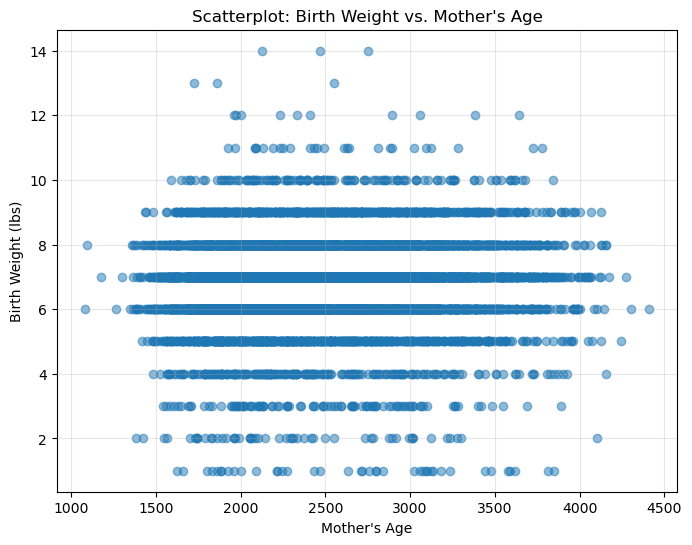

/var/folders/_9/2vrs5s614flg6q_4wbdxnskw0000gn/T/ipykernel_36415/2805669302.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentiles = data.groupby('age_bin')['birthwgt_lb'].quantile([0.25, 0.50, 0.75]).unstack()


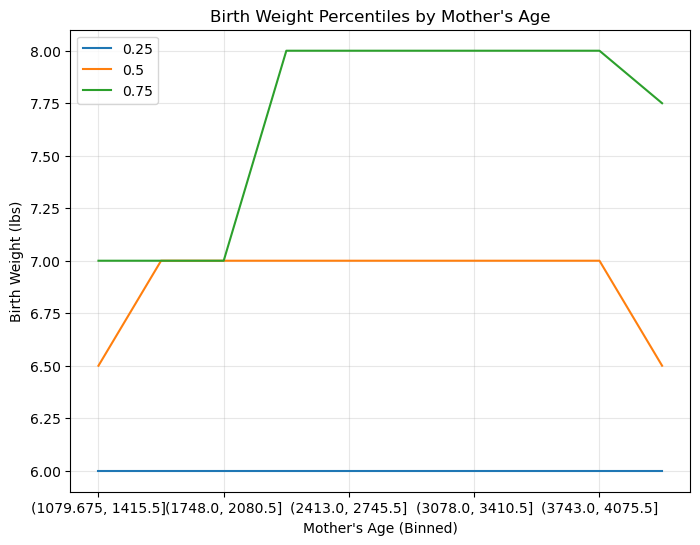

Pearson's Correlation: 0.07 (p-value: 0.000)
Spearman's Rank Correlation: 0.10 (p-value: 0.000)


In [9]:
## Page 89: 7-1 (Using data from the NSFG, make a scatter plot of birth weight versus mother’s age…)

from os.path import basename, exists
import gzip
import thinkstats2
import thinkplot
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

## Download files
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print(f"Downloaded {local}")

# Download required files from github
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

# Decompress the zip file
def decompress_gzip(input_file, output_file):
    with gzip.open(input_file, 'rb') as gz_file:
        with open(output_file, 'wb') as out_file:
            out_file.write(gz_file.read())
    print(f"Decompressed {input_file} to {output_file}")

# Decompress the dataset
decompressed_file = "2002FemPreg.dat"
decompress_gzip("2002FemPreg.dat.gz", decompressed_file)

# Read the .dct file to understand the structure and load the decompressed data
dct_file = "2002FemPreg.dct"
dct = thinkstats2.ReadStataDct(dct_file)
preg = dct.ReadFixedWidth(decompressed_file)

# Filter relevant columns: 'birthwgt_lb' (birth weight) and 'agepreg' (mother's age)
data = preg[['birthwgt_lb', 'agepreg']].copy()
data = data[(data['birthwgt_lb'] > 0) & (data['birthwgt_lb'] < 15)]  # Filter outliers in birth weight
data = data[data['agepreg'] > 10]  # Remove invalid ages

# Scatterplot: Birth Weight vs. Mother's Age
plt.figure(figsize=(8, 6))
plt.scatter(data['agepreg'], data['birthwgt_lb'], alpha=0.5)
plt.title('Scatterplot: Birth Weight vs. Mother\'s Age')
plt.xlabel('Mother\'s Age')
plt.ylabel('Birth Weight (lbs)')
plt.grid(alpha=0.3)
plt.show()

# Percentiles of Birth Weight by Mother's Age
data['age_bin'] = pd.cut(data['agepreg'], bins=10)
percentiles = data.groupby('age_bin')['birthwgt_lb'].quantile([0.25, 0.50, 0.75]).unstack()

percentiles.plot(figsize=(8, 6))
plt.title('Birth Weight Percentiles by Mother\'s Age')
plt.xlabel('Mother\'s Age (Binned)')
plt.ylabel('Birth Weight (lbs)')
plt.grid(alpha=0.3)
plt.show()

# Pearson's and Spearman's Correlation
pearson_corr, pearson_p = pearsonr(data['agepreg'], data['birthwgt_lb'])
spearman_corr, spearman_p = spearmanr(data['agepreg'], data['birthwgt_lb'])

print(f"Pearson's Correlation: {pearson_corr:.2f} (p-value: {pearson_p:.3f})")
print(f"Spearman's Rank Correlation: {spearman_corr:.2f} (p-value: {spearman_p:.3f})")



Bias of x-bar: -0.0195
Bias of median: -0.0440
Bias of S^2: -5.6987
Bias of S^2_(n-1): -2.4470
MSE of x-bar: 3.4467
MSE of median: 5.0317
MSE of S^2: 651.2140
MSE of S^2_(n-1): 668.1334


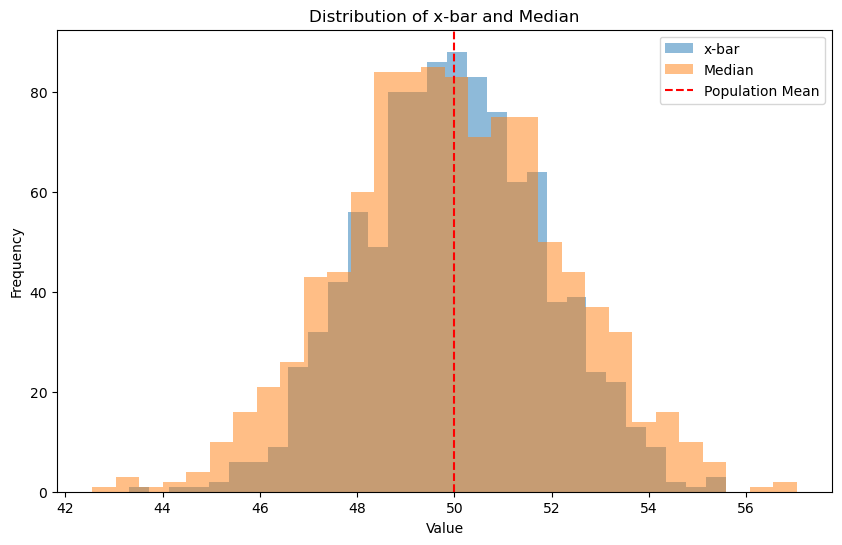

In [11]:
## Page 99: 8-1 (In this chapter we used sample mean to estimate • and found that the sample mean yields lower MSE…)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Experiment created parameters
np.random.seed(42)
population_mean = 50
population_std = 10
population_size = 100000
sample_size = 30
n_samples = 1000

# Generate population
population = np.random.normal(population_mean, population_std, population_size)

# Storage for results
results = {
    "x_bar": [],
    "median": [],
    "S2": [],
    "S2_n1": []
}

# Sampling and estimation
for _ in range(n_samples):
    sample = np.random.choice(population, size=sample_size, replace=False)
    
    # Mean and median estimators
    x_bar = np.mean(sample)
    median = np.median(sample)
    
    # Variance estimators
    S2 = np.var(sample, ddof=0)  # Sample variance with N denominator
    S2_n1 = np.var(sample, ddof=1)  # Sample variance with (N-1) denominator
    
    # Store results
    results["x_bar"].append(x_bar)
    results["median"].append(median)
    results["S2"].append(S2)
    results["S2_n1"].append(S2_n1)

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Compute biases
bias_x_bar = results_df["x_bar"].mean() - population_mean
bias_median = results_df["median"].mean() - population_mean
bias_S2 = results_df["S2"].mean() - population_std**2
bias_S2_n1 = results_df["S2_n1"].mean() - population_std**2

# Compute MSEs
mse_x_bar = np.mean((results_df["x_bar"] - population_mean)**2)
mse_median = np.mean((results_df["median"] - population_mean)**2)
mse_S2 = np.mean((results_df["S2"] - population_std**2)**2)
mse_S2_n1 = np.mean((results_df["S2_n1"] - population_std**2)**2)

# Print results
print(f"Bias of x-bar: {bias_x_bar:.4f}")
print(f"Bias of median: {bias_median:.4f}")
print(f"Bias of S^2: {bias_S2:.4f}")
print(f"Bias of S^2_(n-1): {bias_S2_n1:.4f}")

print(f"MSE of x-bar: {mse_x_bar:.4f}")
print(f"MSE of median: {mse_median:.4f}")
print(f"MSE of S^2: {mse_S2:.4f}")
print(f"MSE of S^2_(n-1): {mse_S2_n1:.4f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.hist(results_df["x_bar"], bins=30, alpha=0.5, label="x-bar")
plt.hist(results_df["median"], bins=30, alpha=0.5, label="Median")
plt.axvline(population_mean, color="red", linestyle="--", label="Population Mean")
plt.title("Distribution of x-bar and Median")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


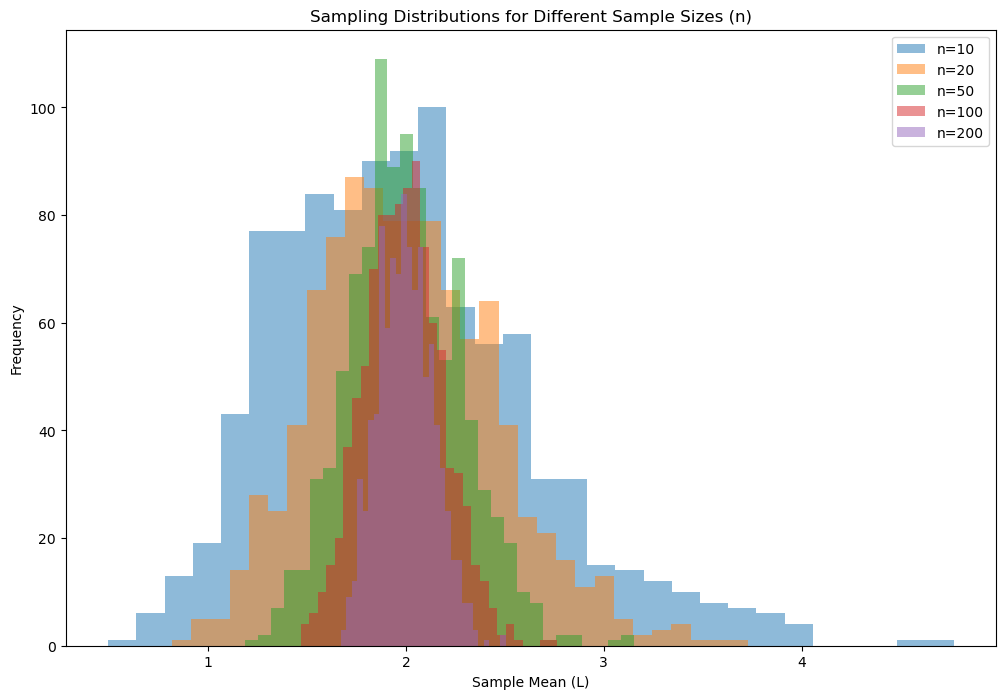

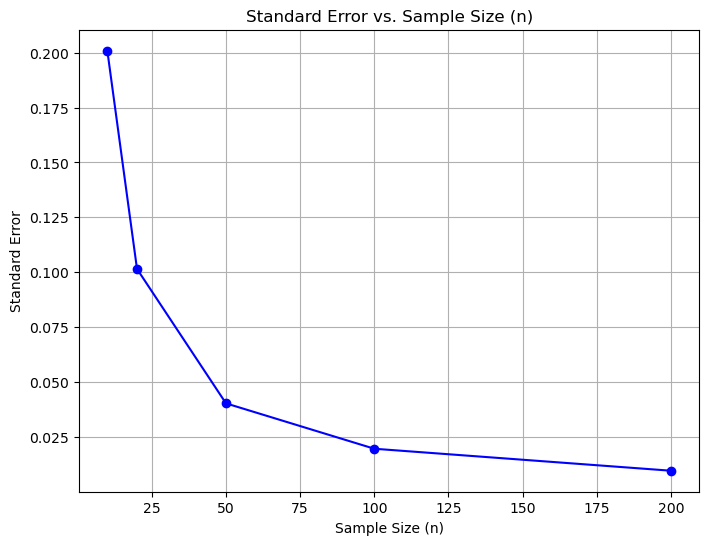

n = 10, 90% Confidence Interval: [1.11191272 3.15666559]
n = 20, 90% Confidence Interval: [1.28650822 2.81467732]
n = 50, 90% Confidence Interval: [1.55263568 2.47999061]
n = 100, 90% Confidence Interval: [1.67772053 2.31806905]
n = 200, 90% Confidence Interval: [1.77930556 2.23316672]


In [13]:
## Page 99: 8-2 (Suppose that you draw a sample size with n = 10 from an exponential distribution with • = 2…)
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set parameters
alpha = 2
num_simulations = 1000

# Function to perform simulation for a given sample size n
def simulate_experiment(n):
    sample_means = []
    
    # Run the experiment 1000 times
    for _ in range(num_simulations):
        sample = np.random.exponential(alpha, n)  # Exponential distribution sample
        sample_means.append(np.mean(sample))  # Estimate L (sample mean)
    
    sample_means = np.array(sample_means)
    
    # Compute standard error
    std_error = np.std(sample_means) / np.sqrt(n)
    
    # Compute 90% confidence interval
    conf_int = np.percentile(sample_means, [5, 95])  # 90% CI
    
    return sample_means, std_error, conf_int

# Simulate the experiment for different values of n
n_values = [10, 20, 50, 100, 200]
std_errors = []
conf_intervals = []

# Plot sampling distribution for each n
plt.figure(figsize=(12, 8))

for n in n_values:
    sample_means, std_error, conf_int = simulate_experiment(n)
    
    # Plot the sampling distribution
    plt.hist(sample_means, bins=30, alpha=0.5, label=f'n={n}')
    
    std_errors.append(std_error)
    conf_intervals.append(conf_int)

plt.title("Sampling Distributions for Different Sample Sizes (n)")
plt.xlabel("Sample Mean (L)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Plot standard error vs. n
plt.figure(figsize=(8, 6))
plt.plot(n_values, std_errors, marker='o', color='b')
plt.title("Standard Error vs. Sample Size (n)")
plt.xlabel("Sample Size (n)")
plt.ylabel("Standard Error")
plt.grid(True)
plt.show()

# Print confidence intervals for each sample size
for n, conf_int in zip(n_values, conf_intervals):
    print(f"n = {n}, 90% Confidence Interval: {conf_int}")
